# Task 0: Recognize facial expressions

## (1).	Load data and visualize images. 

In [2]:
import numpy as np
import pandas as pd

fer2013 = pd.read_csv('./dataset_for_task0/fer2013_7k.csv')[['emotion', 'pixels']] 
fer2013['pixels'] = fer2013['pixels'].apply(lambda x: np.array(x.split()).astype(int))

num_of_dataset = len(fer2013)
print(f"The number of dataset is {num_of_dataset}")

The number of dataset is 6999


Label: anger


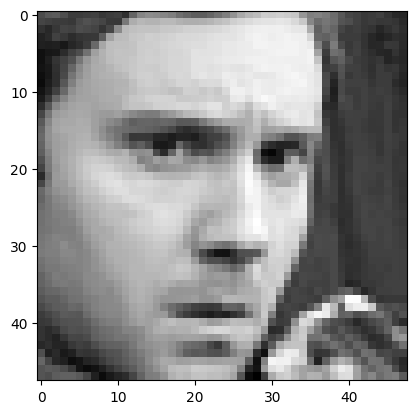

In [3]:
import cv2
import matplotlib.pyplot as plt

emotion_label_to_text = {
    0: 'anger', 1: 'disgust', 
    2: 'fear', 3: 'happiness', 
    4: 'sadness', 5: 'surprise', 
    6: 'neutral'
}

# randomly select one image
img = fer2013['pixels'][0].reshape(48,48)
plt.imshow(img, cmap="gray")
print('Label: {0}'.format(emotion_label_to_text[fer2013['emotion'][0]]))

## (2). Train classification model with logistic regression algorithm on training set and evaluate the model on test set.
- define the Logistic Regression model with solver='sag'
- Train the model on the training set, and evaluate it on the test set.
- Calculate the accuracy on each catagory.

Ref: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [4]:
from sklearn import linear_model

dfTrain = fer2013.iloc[:-1000] # 训练集
dfTest = fer2013.iloc[-1000:] # 测试集

y = dfTrain['emotion'].values.flatten() # 
x = np.vstack(dfTrain['pixels'].values)


In [4]:

# TODO: train the model

######## your code ########
model=linear_model.LogisticRegression(solver='sag',max_iter=1000)
model.fit(x, y)
######## your code ########

e:\anaconda\envs\dl\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(max_iter=1000, solver='sag')

In [ ]:
# TODO: predict outputs on test set

######## your code ########
y_test_pred = model.predict(np.vstack(dfTest['pixels'].values)) 
######## your code ########

In [10]:
from sklearn import metrics

######## your code ########

# get confusion matrix
matrix = metrics.confusion_matrix(dfTest['emotion'].values.flatten(), y_test_pred)
print(matrix)
print(y_test_pred)
# calculate the accuracy and print it
accuracy_each_class = np.diag(matrix) / matrix.sum(axis=1)

[[ 27   1  17  36  16  12  26]
 [  0   0   4   2   4   1   5]
 [ 21   0  24  47  15  21  29]
 [ 24   0  18 145  30  11  19]
 [ 29   0  21  47  36  11  38]
 [ 13   0  15  23  12  43  12]
 [ 17   0  18  42  13  11  44]]
[4 0 3 3 3 3 0 6 0 3 0 3 5 3 3 2 3 3 6 6 0 5 6 5 2 0 2 6 0 0 3 4 3 5 0 6 4
 3 2 6 2 3 0 4 3 3 3 6 3 4 3 4 0 3 4 3 4 0 2 5 6 2 6 3 6 3 3 5 3 2 2 6 4 3
 2 0 0 3 6 0 3 0 3 2 3 4 4 5 3 0 3 2 4 6 5 3 6 2 6 3 4 6 5 3 0 5 3 0 4 4 4
 3 6 5 3 4 3 4 3 0 3 0 6 0 0 6 5 3 3 3 4 3 2 6 4 4 3 0 3 6 5 5 3 5 5 6 4 5
 2 3 4 3 4 6 3 3 3 3 3 2 0 6 5 6 2 3 3 5 2 2 3 4 6 5 3 2 3 0 4 6 0 5 2 5 4
 3 3 3 0 0 2 2 3 0 3 0 6 3 5 3 2 3 5 0 2 2 3 6 4 0 3 2 6 4 6 5 4 3 4 4 4 5
 6 6 3 3 3 6 3 6 6 3 2 2 5 3 4 3 3 5 5 5 4 5 3 3 2 4 2 2 6 5 3 6 2 0 6 2 4
 4 3 3 3 3 6 5 3 3 5 3 5 6 3 4 5 0 6 5 4 0 3 2 5 3 0 3 3 4 3 0 3 3 3 3 6 6
 3 6 5 6 5 4 5 4 6 4 2 0 4 3 0 3 6 4 3 6 3 6 3 4 3 3 0 5 2 6 2 6 2 2 3 4 6
 6 3 3 4 3 3 4 6 6 3 4 3 4 6 3 0 3 3 6 6 3 3 2 0 0 5 6 5 5 5 6 0 6 3 3 3 3
 6 3 6 3 5 5 0 6 3 3 0 4 3 3 5 5

In [25]:
# TODO: calculate the accuracy
# Ref: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
from sklearn import metrics

######## your code ########

# get confusion matrix
matrix = metrics.confusion_matrix(dfTest['emotion'].values.flatten(), y_test_pred)
print(matrix)
# calculate the accuracy and print it
accuracy_each_class = np.diag(matrix) / matrix.sum(axis=1)
n=0
for i in accuracy_each_class:
    
    print(emotion_label_to_text[n]+':'+str(i))
    n=n+1
# print(accuracy_each_class)

######## your code ########

[[ 27   1  17  36  16  12  26]
 [  0   0   4   2   4   1   5]
 [ 21   0  24  47  15  21  29]
 [ 24   0  18 145  30  11  19]
 [ 29   0  21  47  36  11  38]
 [ 13   0  15  23  12  43  12]
 [ 17   0  18  42  13  11  44]]
anger:0.2
disgust:0.0
fear:0.15286624203821655
happiness:0.5870445344129555
sadness:0.1978021978021978
surprise:0.3644067796610169
neutral:0.30344827586206896


## 3. Try different parameters when training the Logistic Regression model
Requirement: Change the values of 'penalty' and 'C', re-train the model, and evaluate the accuracy.

penalty {‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, default=’l2’
C: float, default=1.0

Ref: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

e:\anaconda\envs\dl\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
e:\anaconda\envs\dl\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
e:\anaconda\envs\dl\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
e:\anaconda\envs\dl\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
e:\anaconda\envs\dl\lib\site-packages\sklearn\linear_model\_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
e:\anaconda\envs\dl\lib\site-packages\sklearn\linear_model\_sag

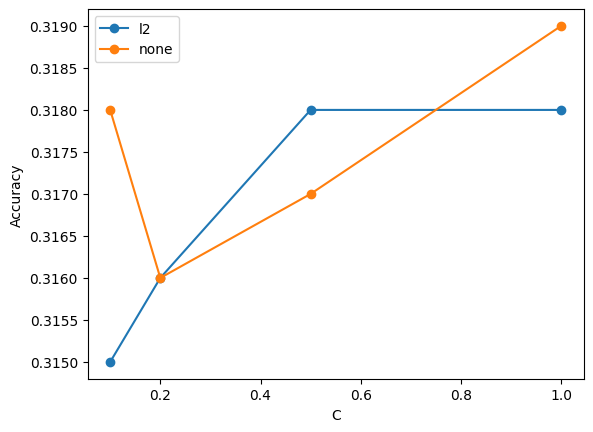

In [8]:
for penalty in ['l2', 'none']:
    accuracy_values = []  # List to store accuracy values for each C
    for c in [0.1, 0.2, 0.5, 1]:
        # Create and train the logistic regression model
        model = linear_model.LogisticRegression(penalty=penalty, C=c, solver='sag')
        model.fit(x, y)

        # Make predictions on the test data
        y_test_pred = model.predict(np.vstack(dfTest['pixels'].values))

        # Calculate and print the accuracy
        matrix = metrics.confusion_matrix(dfTest['emotion'].values.flatten(), y_test_pred)
        accuracy = metrics.accuracy_score(dfTest['emotion'].values, y_test_pred)
        accuracy_values.append(accuracy)

    # Plot the accuracy with different C values and connect them with lines
    plt.plot([0.1, 0.2, 0.5, 1], accuracy_values, label=f"{penalty}", marker='o')

# Adding labels and legend to the plot
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.show()